<a href="https://colab.research.google.com/github/AI-Lab-2025-2-3rd/ai-project-myth/blob/main/superconductor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# 1. GitHub에서 CSV 불러오기
import pandas as pd

# GitHub에 올린 raw 파일 경로 입력
url = "https://raw.githubusercontent.com/AI-Lab-2025-2-3rd/ai-project-myth/refs/heads/main/train.csv"

# 2. Pandas로 읽기
df = pd.read_csv(url)

# 3. 데이터 확인
print(df.shape)
print(df.head())


(12759, 83)
            ID  number_of_elements  mean_atomic_mass  wtd_mean_atomic_mass  \
0  TRAIN_00000                   3           0.42099               0.39479   
1  TRAIN_00001                   4           0.34401               0.22868   
2  TRAIN_00002                   4           0.34437               0.25134   
3  TRAIN_00003                   2           0.43715               0.45117   
4  TRAIN_00004                   4           0.18946               0.19625   

   gmean_atomic_mass  wtd_gmean_atomic_mass  entropy_atomic_mass  \
0            0.42310                0.40580              0.55107   
1            0.26533                0.16498              0.60467   
2            0.26510                0.16350              0.60353   
3            0.44012                0.46167              0.34778   
4            0.16067                0.17351              0.62604   

   wtd_entropy_atomic_mass  range_atomic_mass  wtd_range_atomic_mass  ...  \
0                  0.41532       

=== 0값을 결측치로 간주했을 때 개수 (Train) ===
                              Zero Count
mean_atomic_mass                       5
entropy_atomic_mass                  170
wtd_entropy_atomic_mass              170
range_atomic_mass                    170
wtd_range_atomic_mass                170
std_atomic_mass                      170
wtd_std_atomic_mass                  170
mean_fie                               1
wtd_mean_fie                           1
gmean_fie                              1
wtd_gmean_fie                          1
entropy_fie                          170
wtd_entropy_fie                      170
range_fie                            172
wtd_range_fie                        170
std_fie                              172
wtd_std_fie                          172
mean_atomic_radius                     1
wtd_mean_atomic_radius                 1
gmean_atomic_radius                    1
wtd_gmean_atomic_radius                1
entropy_atomic_radius                170
wtd_entropy_atomic_rad

/tmp/ipython-input-641356847.py:39: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].mode()[0], inplace=True)
/tmp/ipython-input-641356847.py:36: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

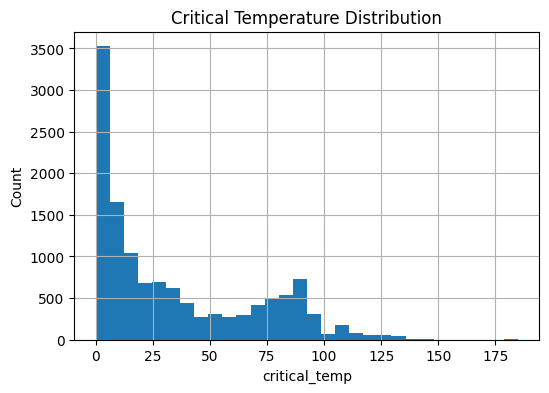

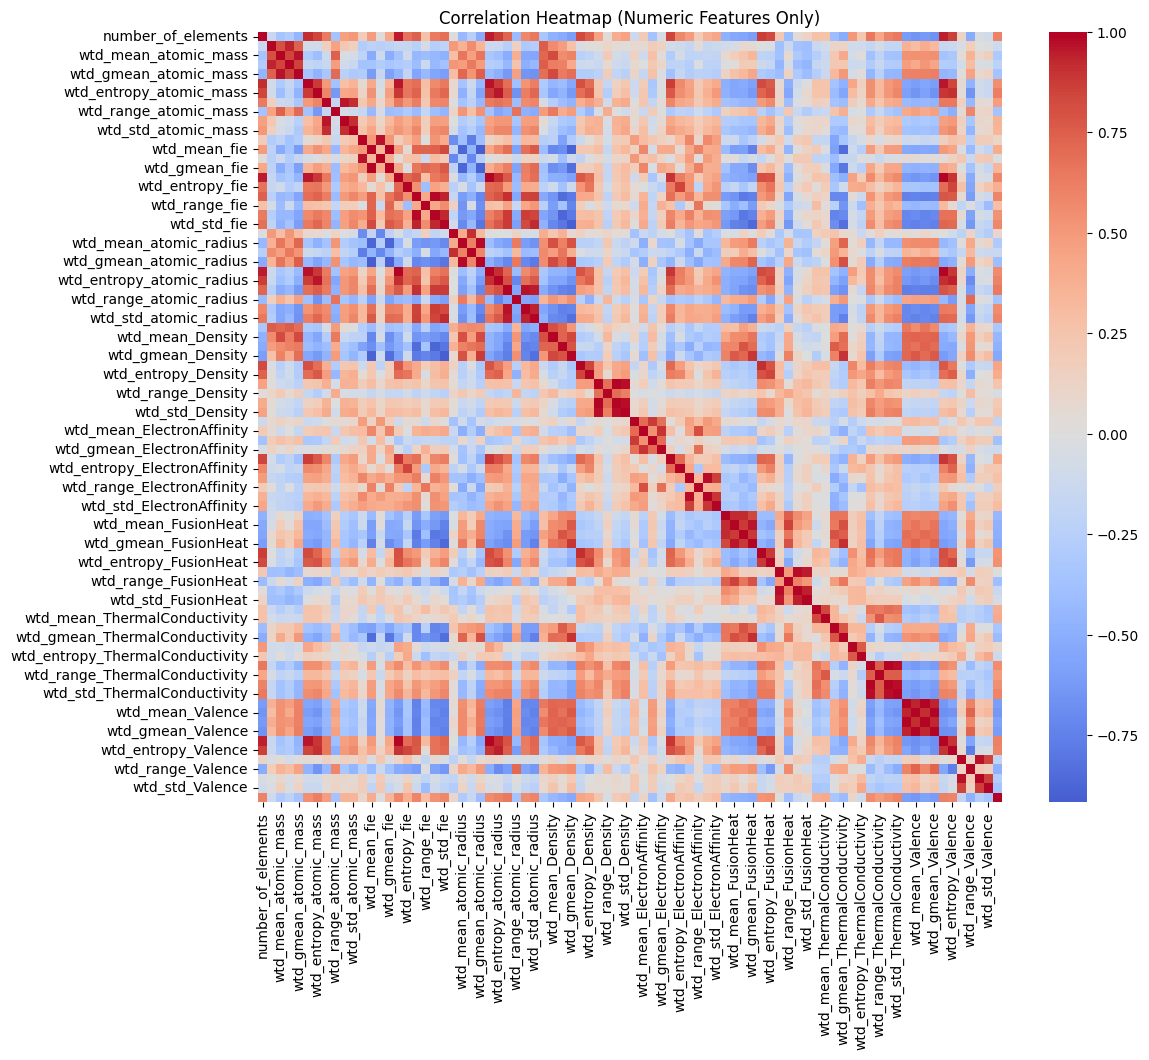

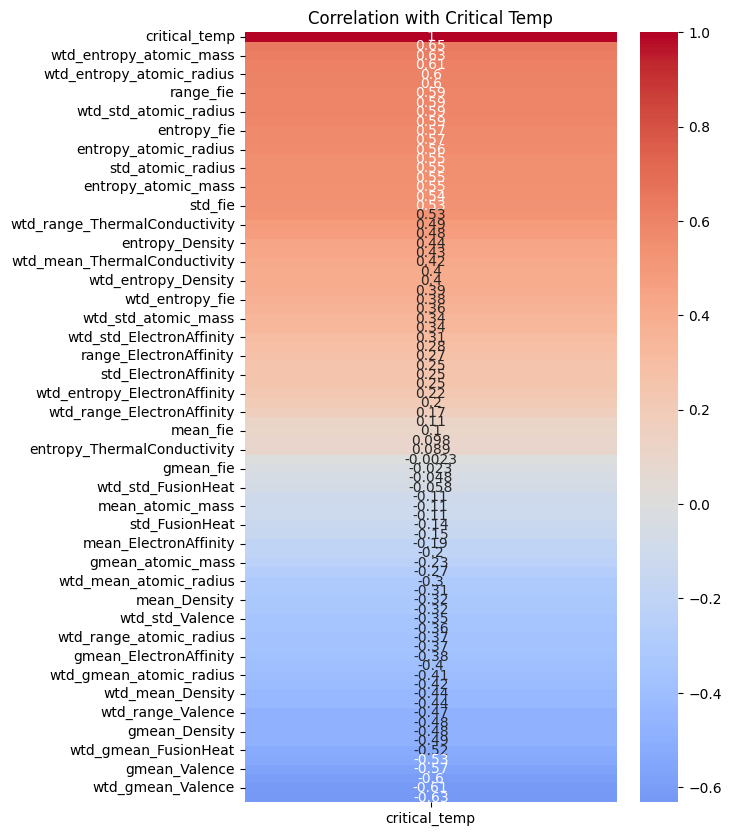

In [15]:
# === 데이터 분석 & 전처리 (critical_temp = Y, 나머지 = X) ===
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. 데이터 불러오기 (train / test)
train_url = "https://raw.githubusercontent.com/AI-Lab-2025-2-3rd/ai-project-myth/refs/heads/main/train.csv"
test_url  = "https://raw.githubusercontent.com/AI-Lab-2025-2-3rd/ai-project-myth/refs/heads/main/test.csv"

train = pd.read_csv(train_url)
test  = pd.read_csv(test_url)

# 2. 불필요한 ID 컬럼 제거
for df in [train, test]:
    if 'id' in df.columns:
        df.drop(columns=['id'], inplace=True)

# 3. 수치형 컬럼만 선택
num_cols_train = train.select_dtypes(include=['int64', 'float64']).columns
num_cols_test  = test.select_dtypes(include=['int64', 'float64']).columns

# 4. 0을 결측치로 간주하고 개수 확인
print("=== 0값을 결측치로 간주했을 때 개수 (Train) ===")
zero_counts_train = {}
for col in num_cols_train:
    zero_counts_train[col] = (train[col] == 0).sum()
zero_counts_train_df = pd.DataFrame.from_dict(zero_counts_train, orient='index', columns=['Zero Count'])
zero_counts_train_df = zero_counts_train_df[zero_counts_train_df['Zero Count'] > 0]
print(zero_counts_train_df, "\n")

# 5. 0 → NaN 변환 후 결측치 처리
for df in [train, test]:
    for col in df.columns:
        if df[col].dtype != "object":  # 수치형
            df[col].replace(0, np.nan, inplace=True)  # 0 → NaN
            df[col].fillna(df[col].mean(), inplace=True)  # 평균으로 대체
        else:  # 범주형
            df[col].fillna(df[col].mode()[0], inplace=True)

# 6. X, Y 분리 (train / test)
X_train = train.drop(columns=['critical_temp'])
Y_train = train['critical_temp']
X_test  = test.copy()

print("X_train shape:", X_train.shape)
print("Y_train shape:", Y_train.shape)
print("X_test shape:", X_test.shape)
print("X_train columns:", X_train.columns.tolist()[:10], "...")

# 7. 타깃 분포 확인 (critical_temp)
plt.figure(figsize=(6,4))
train['critical_temp'].hist(bins=30)
plt.title("Critical Temperature Distribution")
plt.xlabel("critical_temp")
plt.ylabel("Count")
plt.show()

# 8. 수치형 변수 상관관계 히트맵
num_train = train.select_dtypes(include=['int64', 'float64'])
plt.figure(figsize=(12,10))
sns.heatmap(num_train.corr(), cmap="coolwarm", center=0)
plt.title("Correlation Heatmap (Numeric Features Only)")
plt.show()

# 9. critical_temp와 피처들 간의 상관관계 히트맵
corr_with_target = num_train.corr()['critical_temp'].sort_values(ascending=False)
plt.figure(figsize=(6,10))
sns.heatmap(corr_with_target.to_frame(), annot=True, cmap="coolwarm", center=0)
plt.title("Correlation with Critical Temp")
plt.show()


In [16]:
# 1. critical_temp와 수치형 컬럼 간 상관계수 계산
num_train = train.select_dtypes(include=['int64', 'float64'])
corr_with_target = num_train.corr()['critical_temp'].drop('critical_temp')  # 자기 자신 제외

# 2. 상관계수 절댓값 기준으로 정렬
corr_with_target_abs = corr_with_target.abs().sort_values(ascending=False)

# 3. 상위 n개 컬럼 선택 (예: 상위 10개)
top_features = corr_with_target_abs.head(10).index.tolist()
print("=== Critical Temp와 상관계수 상위 10개 피처 ===")
print(top_features)

# 4. X_train, X_test를 상위 피처만 사용하도록 수정
X_train = X_train[top_features]
X_test  = X_test[top_features]

print("X_train shape (selected features):", X_train.shape)
print("X_test shape (selected features):", X_test.shape)


=== Critical Temp와 상관계수 상위 10개 피처 ===
['range_atomic_radius', 'wtd_mean_Valence', 'wtd_entropy_atomic_mass', 'wtd_gmean_Valence', 'entropy_Valence', 'wtd_entropy_atomic_radius', 'mean_Valence', 'number_of_elements', 'range_fie', 'wtd_std_ThermalConductivity']
X_train shape (selected features): (12759, 10)
X_test shape (selected features): (8504, 10)


In [ ]:
from sklearn.model_selection import train_test_split

# Train 데이터를 다시 학습/검증 세트로 나눔 (예: 80:20)
X_train_split, X_valid, Y_train_split, Y_valid = train_test_split(
    X_train, Y_train, test_size=0.2, random_state=42
)

print("X_train_split shape:", X_train_split.shape)
print("Y_train_split shape:", Y_train_split.shape)
print("X_valid shape:", X_valid.shape)
print("Y_valid shape:", Y_valid.shape)


X_train_split shape: (10207, 82)
Y_train_split shape: (10207,)
X_valid shape: (2552, 82)
Y_valid shape: (2552,)
